In [21]:
from sympy import *
import numpy as np
init_printing()

Defines
---

In [22]:
H, Hx, Hy, Hz = symbols('H, H_x, H_y, H_z')
E, Ex, Ey, Ez = symbols('E, E_x, E_y, E_z')
k, kx, ky, kz = symbols('k, k_x, k_y, k_z')
q, qx, qy, qz = symbols('q, q_x, q_y, q_z')
c, w, Eps_par, Eps_per = symbols('c, \omega, \epsilon_\parallel, \epsilon_\perp')
Eps_eff = symbols('\epsilon_{eff}')

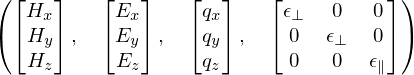

In [23]:
H = Matrix([
        Hx,
        Hy,
        Hz
    ])
E = Matrix([
        Ex,
        Ey,
        Ez
    ])
q = Matrix([
        qx,
        qy,
        qz
    ])
#q = (c/w)*k
Eps = Matrix([
        [Eps_per, 0, 0],
        [0,Eps_per,0],
        [0,0,Eps_par]
    ])
H, E, q, Eps

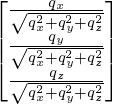

In [24]:
s = q/sqrt(q.dot(q))
s

Solve for polarizations
---

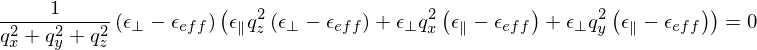

In [28]:
frensel_eq = Eq(
    s[0]**2*Eps_per*(Eps_eff - Eps_per)*(Eps_eff - Eps_par)+
    s[1]**2*Eps_per*(Eps_eff - Eps_per)*(Eps_eff - Eps_par)+
    s[2]**2*Eps_par*(Eps_eff - Eps_per)*(Eps_eff - Eps_per),
    0
  )
simplify(frensel_eq)

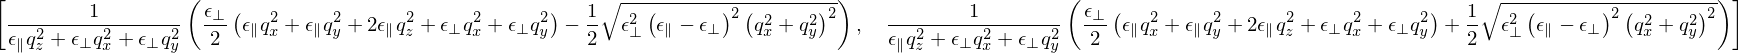

In [26]:
Eps_eff_sol = solve(frensel_eq, [Eps_eff])
Eps_eff_sol

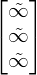

In [33]:
simplify(Matrix([
        s[0]/(Eps_eff_sol[0]-Eps_per),
        s[1]/(Eps_eff_sol[0]-Eps_per),
        s[2]/(Eps_eff_sol[0]-Eps_per)
    ])).subs({qx:1, qy:1, qz:1, Eps_per:1, Eps_par:2})